## Iniciacilizacion

Para empezar tenemos que nuestro data set es "https://www.kaggle.com/datasets/uciml/iris/data" por lo tanto procedemos a importarlo

- Los pasos a seguir son exactamente los mismos que en la asignacion #1

In [64]:
import os
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns


!pip install kaggle

In [65]:

files.upload()
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory


In [66]:
!kaggle datasets download -d uciml/adult-census-income
!unzip adult-census-income.zip
!ls

Dataset URL: https://www.kaggle.com/datasets/uciml/adult-census-income
License(s): CC0-1.0
adult-census-income.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  adult-census-income.zip
replace adult.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
adult-census-income.zip  adult.csv  sample_data


Verificamos que el data set se importo correctamente guardando el dataset en la variable df_income y usando head() para mostrar los primeros 5 elementos de los datos.

In [67]:
df_income = pd.read_csv('adult.csv')
display(df_income.head())

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


## Pregunta 1: Descripcion del dataset

- El dataset  esta compuesto por 15 columnas y 32561 filas, esto lo verificamos usando el metodo shape que lo hace es darnos informacion acerca del conjunto, en este caso nos retorna una tupla que nos dice (filas,columnas) es decir hay 32561 filas o elementos y 15 columnas o caracteristicas.

In [68]:
df_income.shape

(32561, 15)

- Tambien usando el metodo info(), podemos el tipo de datos de cada columnas por ejemplo tenemos 6 caracteristicas de tipo numerico y 9 de tipo object

In [69]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Pregunta 2: Estadisticas descriptivas

- Las estadisticas descriptivas son aquellas numericas, es decir estas donde obtenemos informmacion del tipo medi, desviacion estandar, etc. Por lo tanto procedemos a seleccionar las varaibles numericas, con el metodo select_dtypes y aquellas variable son del tipo entero y flotante.

- Y verificamos que la nueva variable df_numeric se haya creado y almacenada correctamente usando head() nuevamente. Y efectivamente las 6 variables numericas estan almacenadas en df_numeric.



In [70]:
df_numeric = df_income.select_dtypes(include=['int64', 'float64'])
df_numeric.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
0,90,77053,9,0,4356,40
1,82,132870,9,0,4356,18
2,66,186061,10,0,4356,40
3,54,140359,4,0,3900,40
4,41,264663,10,0,3900,40


- Almacenamos todas las estadisticas descriptivas necesarias, como lo son la media, mediana, D.E, minimo y maximo.

- Posteriormente mostramos los datos almacenados en la variable estadisticas.

In [71]:
estadisticas = pd.DataFrame({
    "Media": df_numeric.mean(),
    "Mediana": df_numeric.median(),
    "Desviación Estándar": df_numeric.std(),
    "Mínimo": df_numeric.min(),
    "Máximo": df_numeric.max()
})

estadisticas

,Media,Mediana,Desviación Estándar,Mínimo,Máximo
age,38.581647,37.0,13.640433,17,90
fnlwgt,189778.366512,178356.0,105549.977697,12285,1484705
education.num,10.080679,10.0,2.572720,1,16
capital.gain,1077.648844,0.0,7385.292085,0,99999
capital.loss,87.303830,0.0,402.960219,0,4356
hours.per.week,40.437456,40.0,12.347429,1,99


## Pregunta 3: Valores Faltantes

- Para encontrar los valores faltanes en el dataset, podemos usar en conjunto los metodos isnull y sum, esto lo que hace es, si consiga una fila de la columna con un conjunto vacio lo sumara y al final mostrara el total por columna de cuantos elementos o valores faltantes existen.

In [72]:
df_income.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0


- Al ejecutar lo anteriomente mencionado podemos observar que "no existen" valores faltantes. Pero con este dataset pasa algo curioso, observando los datos desde kaggle observamos que a pesar de que existen valores tiene un signo de interrogacion "?" es decir "datos desconocido".

In [73]:
(df_income == "?").sum()

,0
age,0
workclass,1836
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,1843
relationship,0
race,0
sex,0


- Por otro lado existen datos en 0 como lo son capital.gain y capital.loss asi que podemos usar la variable df_numeric para observar dichos datos. En este caso en particular existen muchos valores en 0, PERO es capital.gain y capital.loss estas variables pueden indicar si la persona gano con un fondo de inversion o si perdio con el mismo, entonces podemos intuir que si el valor es 0 significa no obtuvo ni ganancia o perdida, por lo tanto este valor no nos aporta nada de informacion significativa ya que tienen muchos valores en 0.

- Para capital.gain son 29849 y para capital.loss son 31042 para un total del 91.6% y 95% respectivamente, por lo tanto quizas podamos prescindir de estas caracteristicas por la cantidad de datos faltanes.

In [74]:
df_numeric2 = df_numeric.copy()
df_numeric2['capital.gain'] = df_numeric['capital.gain'].replace(0, np.nan)
df_numeric2['capital.loss'] = df_numeric['capital.loss'].replace(0, np.nan)
df_numeric2.isnull().sum()

,0
age,0
fnlwgt,0
education.num,0
capital.gain,29849
capital.loss,31042
hours.per.week,0


## Pregunta 4: Histogramas

- Los histogramas para las variables seleccionadas son "edad", "horas por semana" y "capital ganado"

Para la distribucion de la edad podemos observar que la cantidad de trabajadores son en su mayoria persons de entre 20 y 50 años aproximadamente, vienod una disminucion considerable y constante para los de 50 en adelante

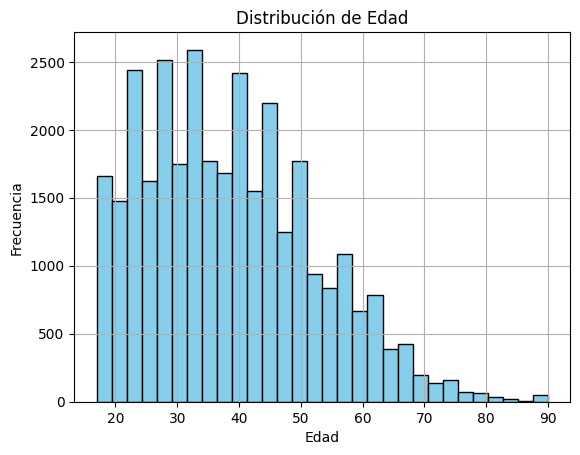

In [75]:
df_income['age'].hist(bins=30, edgecolor='black', color='skyblue')
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

- Tambien podemos observar en la variable de horas por semana que en su mayoria todos trabajan 40 horas por semana

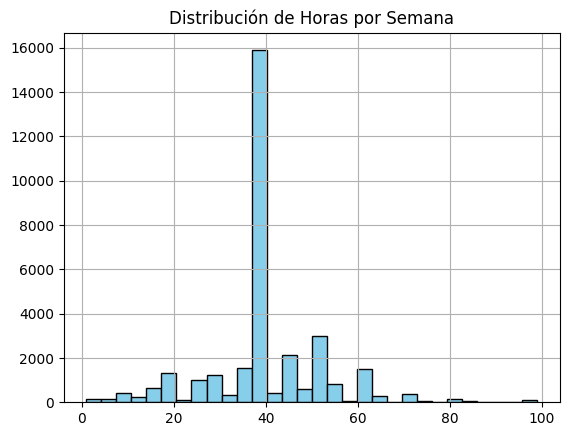

In [76]:
df_income['hours.per.week'].hist(bins=30, edgecolor='black', color='skyblue')
plt.title('Distribución de Horas por Semana')
plt.show()

- Por ultimo complementando lo mencionado en el apartado anterior, en el histograma se puede diferencias la gran cantidad de valores en 0 en el siguiente histograma.

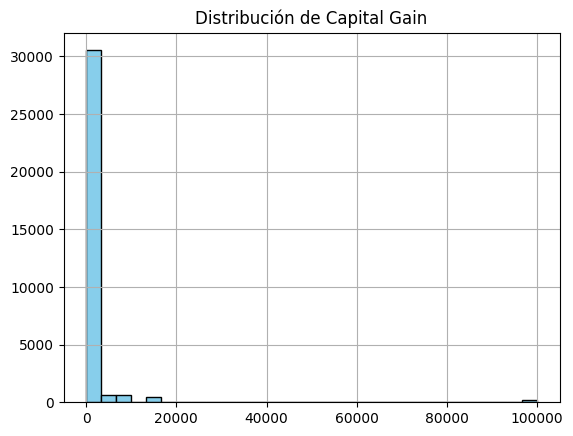

In [77]:
df_income['capital.gain'].hist(bins=30, edgecolor='black', color='skyblue')
plt.title('Distribución de Capital Gain')
plt.show()

## Pregunta 5: Outliers

- Los outliers son valores anomalos, por ende una de las variables tomadas en cuenta para esto es la edad, ya que la mayoria son personas entre los 30 y los  50 existen valores de entre 80 y 90 algo sumamente extraño, Aunque exista la posibilidad de que estas personas obtengan sus ingresos por pensiones u otros medios.

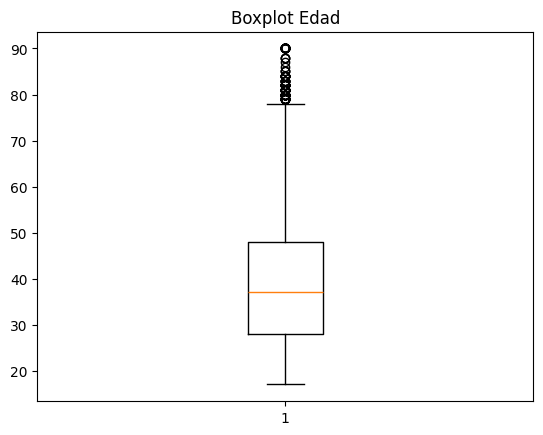

In [78]:
plt.boxplot(df_income['age'])
plt.title('Boxplot Edad')
plt.show()

- Por su contraparte en trabajos de horas por semana, tambien existen muchos valores anomalos, ya que el peak o la gran mayoria de los datos trabajan alrededor de 40 horas, estos outliers pueden interpretarse como dueños de negocios que trabajan mas de lo normal o personas que trabajan por su propia cuenta, mientras que los valores anomalos inferiores se puede deber a personas que trabajan medio tiempo o tiempo parcial, como puede ser un estudiante.

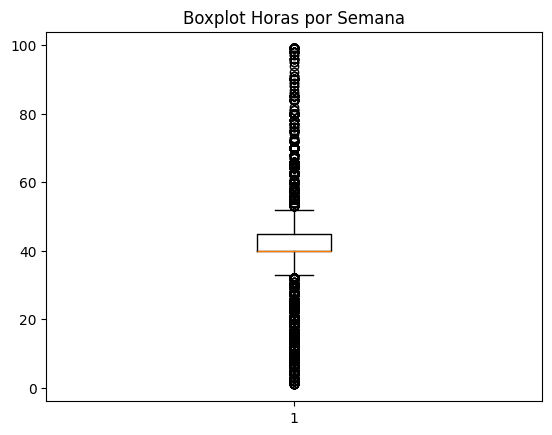

In [79]:
plt.boxplot(df_income['hours.per.week'])
plt.title('Boxplot Horas por Semana')
plt.show()

## Pregunta 6: Matriz correlacion

- Por ultimo la matriz de correlacion, nos indica que variables estan relacionadas entre si, mientras los valores cercanos a 1 nos indica una alta correlacion los valores negativos nos indican totalmente lo contrario, por esto la matriz diagonal que es la relacion de la variable consigo misma es 1.

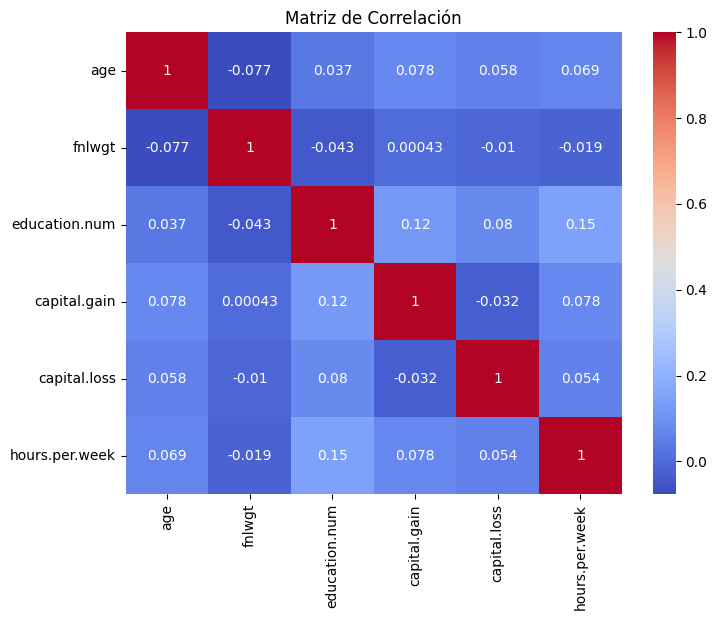

In [80]:
corr_matrix = df_numeric.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

- Con el heatmap podemos observar que las variables que estan mas relacionadas son "horas por semana" y "education num". Si queremos hallar el par que esta mayor relacionadas, primero eliminamos la diagonal y luego usamos .idxmax, esto nos devuelve un par ordenador del numero mayor en este caso se observa claramente que el numero mas grande en la matriz es 0.15 correspondiente a las caracteristicas mencionadas.

In [81]:
corr_unstack = corr_matrix.abs().unstack()
corr_unstack = corr_unstack[corr_unstack < 1]

max_corr = corr_unstack.idxmax()
max_corr

('education.num', 'hours.per.week')

- Por ultimo se muestra el grafico de scatter plot de las variables mencionadas anteriormente y almacenadas en max_corr.

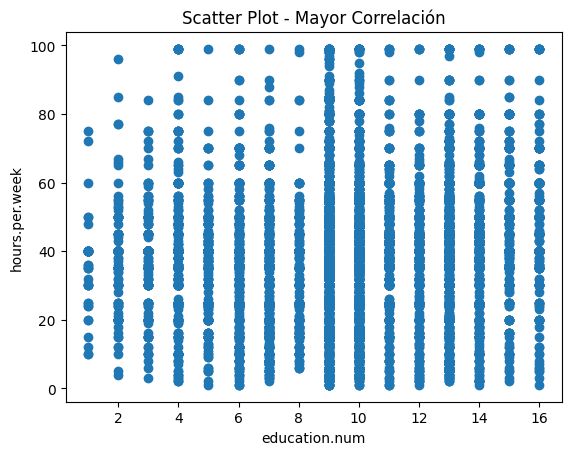

In [82]:
plt.scatter(df_income[max_corr[0]], df_income[max_corr[1]])
plt.xlabel(max_corr[0])
plt.ylabel(max_corr[1])
plt.title('Scatter Plot - Mayor Correlación')
plt.show()

# Nota Final: Como el final de la asignacion era estudiar el data set, no se modifico ni se aplicaron tecnicas de preprocesamiento, por ende no se modificaron las variables originales como df_income